<a href="https://colab.research.google.com/github/BeshoAbdo173/NLP-ASR-GradProject/blob/master/ASR_GradProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install librosa
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install preprocess

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import librosa
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np
from tqdm import tqdm
import librosa.display
from preprocess import *
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, LSTM
import matplotlib.pyplot as plt
import IPython.display as ipd

48000
[[ 3.0120468e-09  3.0120468e-09]
 [ 1.0278329e-08  1.0278329e-08]
 [ 1.7721565e-08  1.7721565e-08]
 ...
 [-4.2673378e-04 -4.2673378e-04]
 [-3.9922766e-04 -3.9922766e-04]
 [-4.9958343e-04 -4.9958343e-04]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  import sys


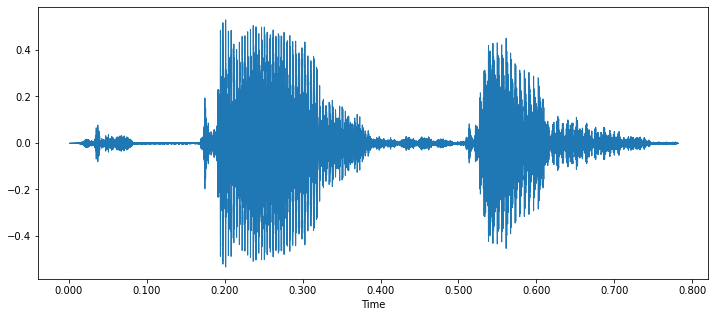

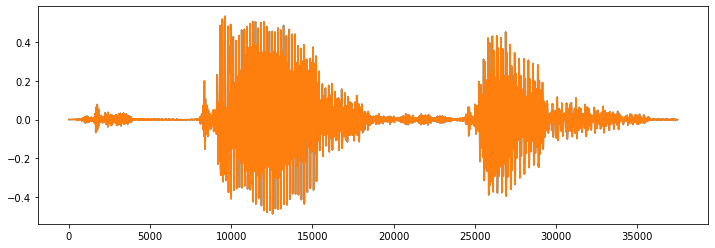

In [4]:
filepath = "/content/drive/MyDrive/NLP-ASR-MODEL/Data/100_2.wav"
ipd.Audio(filepath)
data, sample_rate = librosa.load(filepath)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(data, sr=sample_rate)
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(filepath)
print(wave_sample_rate)
print(wave_audio)
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

48000
[[-0.00046209 -0.00046209]
 [-0.00044927 -0.00044927]
 [-0.00044868 -0.00044868]
 ...
 [-0.00140557 -0.00140557]
 [-0.00146497 -0.00146497]
 [-0.00153451 -0.00153451]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  import sys


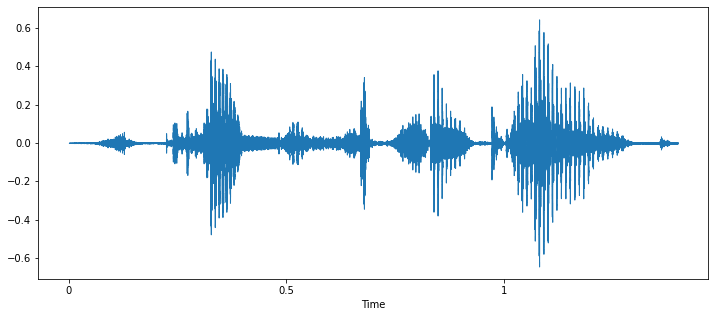

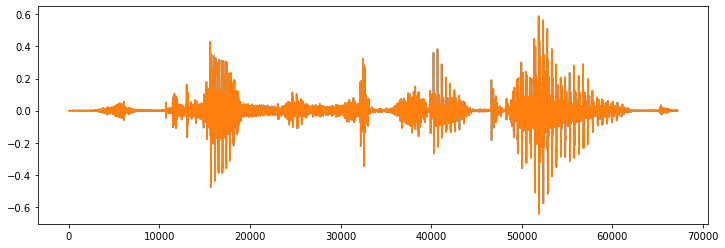

In [7]:
filepath = "/content/drive/MyDrive/NLP-ASR-MODEL/Data/256.wav"
ipd.Audio(filepath)
data, sample_rate = librosa.load(filepath)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(data, sr=sample_rate)
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(filepath)
print(wave_sample_rate)
print(wave_audio)
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

In [10]:
filepath = "/content/drive/MyDrive/NLP-ASR-MODEL/Data/380.wav"
ipd.Audio(filepath)

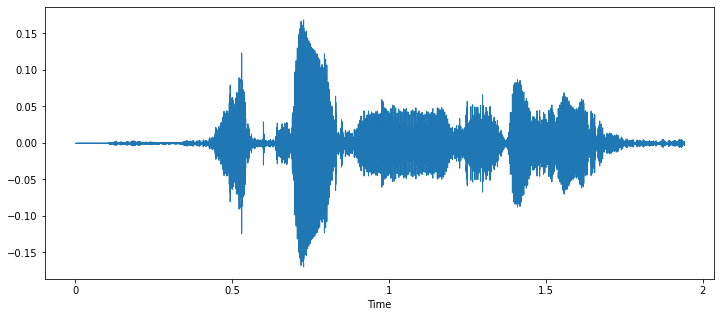

In [11]:
data, sample_rate = librosa.load(filepath)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(data, sr=sample_rate)

48000
[      0       0       0 ... 5370906 5358580 5255405]


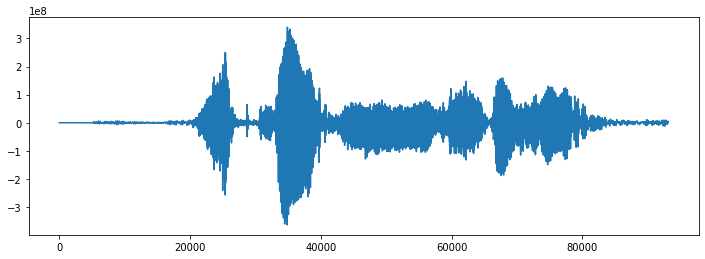

In [12]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(filepath)
print(wave_sample_rate)
print(wave_audio)
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4) )
plt.plot(wave_audio)

In [13]:
import pandas as pd
metadata = pd.read_csv('/content/drive/MyDrive/NLP-ASR-MODEL/metadata/Instruments.csv')
metadata.head(400)

,slice_file_name,fold,classID,class
0,16_2.wav,1,0,scalpel
1,17_2.wav,1,0,scalpel
2,18_2.wav,1,0,scalpel
3,19_2.wav,1,0,scalpel
4,20_2.wav,1,0,scalpel
...,...,...,...,...
395,421.wav,4,3,curved_mayo_sicssor
396,422.wav,4,3,curved_mayo_sicssor
397,423.wav,4,3,curved_mayo_sicssor
398,424.wav,4,3,curved_mayo_sicssor


In [14]:
metadata['class'].value_counts()

scalpel                      105
straight_dissection_clamp    100
curved_mayo_sicssor          100
straight_mayo_sicssor         95
Name: class, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


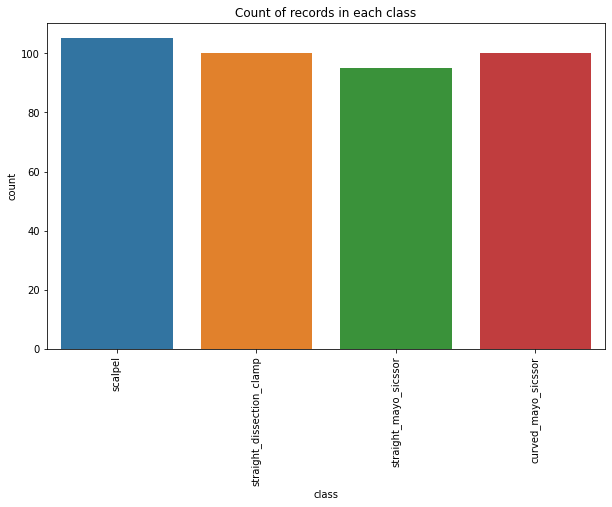

In [15]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(metadata['class'])
plt.title("Count of records in each class")
plt.xticks(rotation="vertical")
plt.show()

In [17]:
mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=40)
print(mfccs.shape)
print(mfccs)

(40, 84)
[[-6.7835712e+02 -6.7835712e+02 -6.7835712e+02 ... -6.2500055e+02
  -6.2590051e+02 -6.1151178e+02]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  6.2529263e+01
   6.0573799e+01  7.5240303e+01]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  4.4492249e+01
   4.1728249e+01  4.5301167e+01]
 ...
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  4.7477567e-01
   2.1200010e-01  5.2146298e-01]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  8.0132837e+00
   7.9964709e+00  4.3215566e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  3.8776939e+00
   5.8043108e+00  3.0755000e+00]]


In [18]:
def features_extractor(file):
    #load the file (audio)
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    #we extract mfcc
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    #in order to find out scaled feature we do mean of transpose of value
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    return mfccs_scaled_features

In [19]:
#Now we ned to extract the featured from all the audio files so we use tqdm
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath('/content/drive/MyDrive/NLP-ASR-MODEL/Data/'),str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

400it [00:28, 14.15it/s]


In [20]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-377.4645, 61.72468, -27.067968, 30.731216, -...",scalpel
1,"[-385.23694, 71.85136, -16.470957, 36.42555, -...",scalpel
2,"[-382.9297, 73.41553, -27.842405, 35.637627, -...",scalpel
3,"[-400.645, 69.08369, -18.337183, 35.613712, -9...",scalpel
4,"[-395.57275, 66.22247, -33.789635, 33.84744, -...",scalpel


In [21]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())
### Label Encoding -> Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM
from keras.layers import Bidirectional
from keras.layers import LSTM
from sklearn import metrics
### No of classes
num_labels=y.shape[1]

In [23]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.2))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.2))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [24]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam' )
###, loss='mse'

In [25]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 
num_epochs = 200
num_batch_size =10
checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/ColabNotebooks/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()
history = model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)
duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/200
32/32 [==============================] - ETA: 0s - loss: 15.1255 - accuracy: 0.2500
Epoch 1: val_loss improved from inf to 4.49089, saving model to /content/drive/MyDrive/ColabNotebooks/audio_classification.hdf5
32/32 [==============================] - 3s 25ms/step - loss: 15.1255 - accuracy: 0.2500 - val_loss: 4.4909 - val_accuracy: 0.3500
Epoch 2/200
29/32 [==========================>...] - ETA: 0s - loss: 6.9756 - accuracy: 0.2690
Epoch 2: val_loss improved from 4.49089 to 2.00049, saving model to /content/drive/MyDrive/ColabNotebooks/audio_classification.hdf5
32/32 [==============================] - 0s 11ms/step - loss: 6.6922 - accuracy: 0.2812 - val_loss: 2.0005 - val_accuracy: 0.3625
Epoch 3/200
31/32 [============================>.] - ETA: 0s - loss: 3.8562 - accuracy: 0.2774
Epoch 3: val_loss improved from 2.00049 to 1.55411, saving model to /content/drive/MyDrive/ColabNotebooks/audio_classification.hdf5
32/32 [==============================] - 0s 12ms/step - loss:

In [26]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.824999988079071


In [27]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[13  0  1  0]
 [ 0 23  4  1]
 [ 0  0 18  1]
 [ 5  0  2 12]]


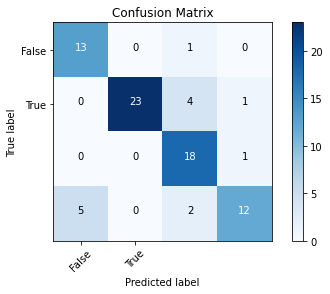

In [28]:
from sklearn.metrics import confusion_matrix
import itertools
cm_plot_labels = ['False' , 'True']
y_pred=model.predict(X_test) 
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [29]:
#model.predict_classes(X_test)
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)
print(classes_x)

[2 1 3 3 0 1 0 0 2 0 1 2 2 0 1 2 1 2 3 3 3 0 2 2 2 2 2 1 1 2 3 2 2 0 1 2 2
 3 3 0 2 2 3 1 1 1 2 0 3 0 0 2 1 3 0 3 1 1 1 1 1 0 1 3 3 0 2 2 0 1 2 0 1 1
 2 1 0 1 0 2]


In [30]:
filename="/content/drive/MyDrive/tes1/curved_mayo_sicssor.wav"
#preprocess the audio file
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
#Reshape MFCC feature to 2-D array
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
#predicted_label=model.predict_classes(mfccs_scaled_features)
x_predict=model.predict(mfccs_scaled_features) 
predicted_label=np.argmax(x_predict,axis=1)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
print(prediction_class)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


FileNotFoundError: ignored

In [33]:
import os
from sklearn.metrics import accuracy_score
from numpy import sort

# folder path
dir_path = r'/content/drive/MyDrive/NLP-ASR-MODEL/Test/'

# list to store files
res = []
y_true = []
# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        filename= dir_path + path
        #preprocess the audio file
        audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
        mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
        #Reshape MFCC feature to 2-D array
        mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
        #predicted_label=model.predict_classes(mfccs_scaled_features)
        x_predict=model.predict(mfccs_scaled_features) 
        predicted_label=np.argmax(x_predict,axis=1)
        prediction_class = labelencoder.inverse_transform(predicted_label)
        res.append(predicted_label[0])
        new_filename = path.split('_')
        pred_file = new_filename[1].split('.')
        final_label = pred_file[0]
        y_true.append(int(final_label))


print(y_true)
print(res)
score = accuracy_score(y_true = y_true, y_pred = res)
print(score)       



[]
[]
nan


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [34]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


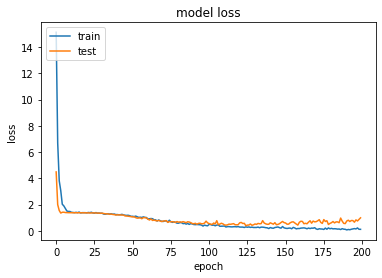

In [35]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

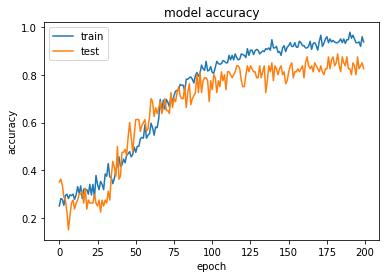

<Figure size 432x288 with 0 Axes>

In [36]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('NLP Visualization.jpg')


In [40]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics


confusion_matrix = metrics.confusion_matrix(y_true, res)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()